In [25]:
import math

import matplotlib.pyplot as plt

from notebooks.analytics.utils import init_analysis, boxplot_metric, savefig

In [10]:
EXP_NAME = "fed_avg_08"

In [11]:
df = init_analysis(EXP_NAME)

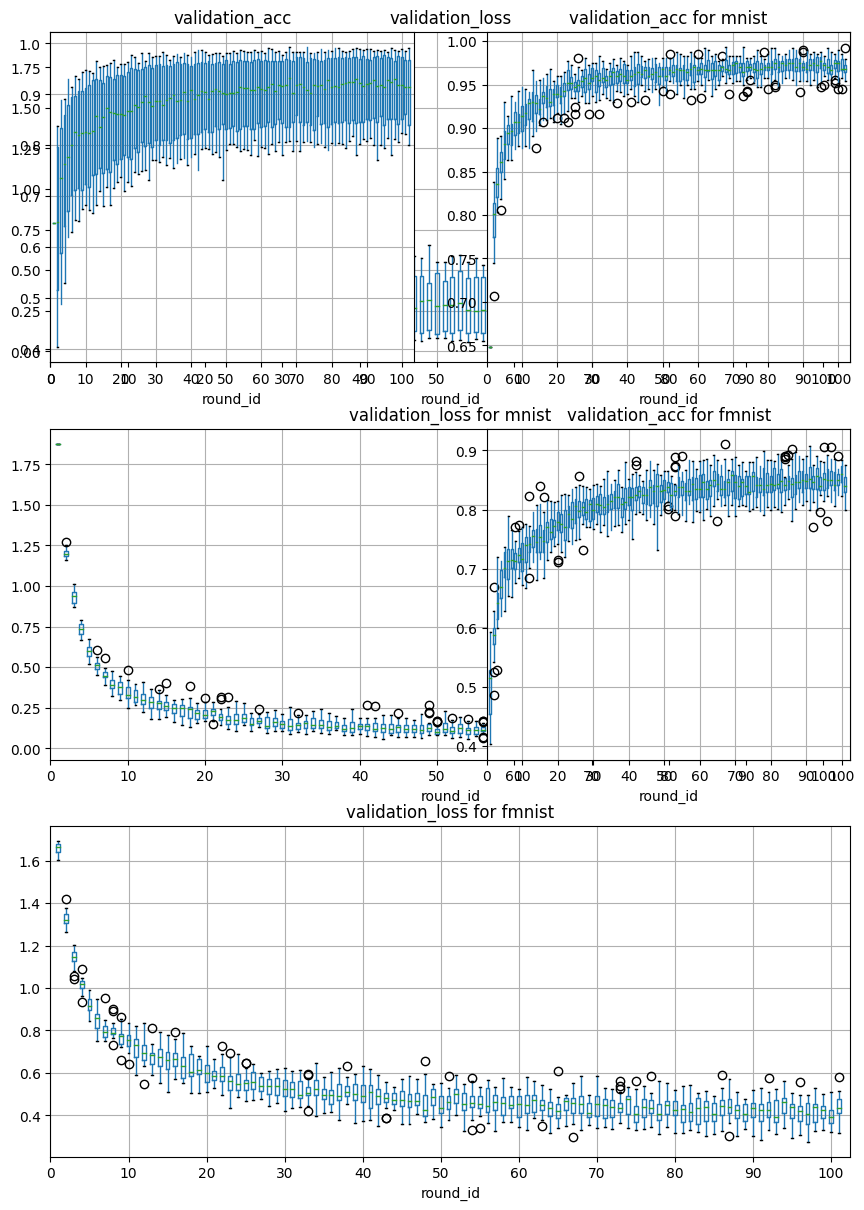

In [48]:
def boxplot_from_df(ax, df, column, xticks, title):
        plot_ax = df.boxplot(column, by="round_id", ax=ax)
        plot_ax.set_xticks(xticks, xticks)
        plot_ax.set_title(title)
        plot_fig = plot_ax.get_figure()
        plot_fig.suptitle('')
        #savefig(plot_fig, title.lower().replace(" ", "_"))
        return plot_ax

def boxplot_metric(fig, df, metric, offset = 0):
    if metric in df.columns:
        datasets = df.dataset.unique()
        n_plots = 1 if len(datasets) < 2 else 1 + len(datasets)
        ax = fig.add_subplot(n_plots, 1+offset, 1)
        max_round = df.round_id.max()
        xticks = range(0, int(max_round), int(math.floor(max_round)/10))
        boxplot_ax = boxplot_from_df(
            ax,
            df.groupby(["round_id", "trainer_id"]).max(),
            metric,
            xticks,
            metric
            )
        #savefig(plot_fig, metric)
        if len(datasets) > 1:
            for i, dataset in enumerate(datasets):
                ax = fig.add_subplot(n_plots, 1+offset, i+2 + i*offset)
                boxplot_ax = boxplot_from_df(
                    ax,
                    df.loc[df.dataset == dataset].groupby(["round_id", "trainer_id"]).max(),
                    metric,
                    xticks,
                    f"{metric} for {dataset}"
                    )
        return fig
n_plots = 3
fig = plt.figure(figsize=(10, 5 * n_plots))
fig_0 = boxplot_metric(fig, df, "validation_loss")
fig_1 = boxplot_metric(fig, df, "validation_acc", offset=1)
plt.show()

C:\Users\micdu\AppData\Local\Temp\ipykernel_24508\4014463099.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\AppData\Local\Temp\ipykernel_24508\4014463099.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\AppData\Local\Temp\ipykernel_24508\4014463099.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


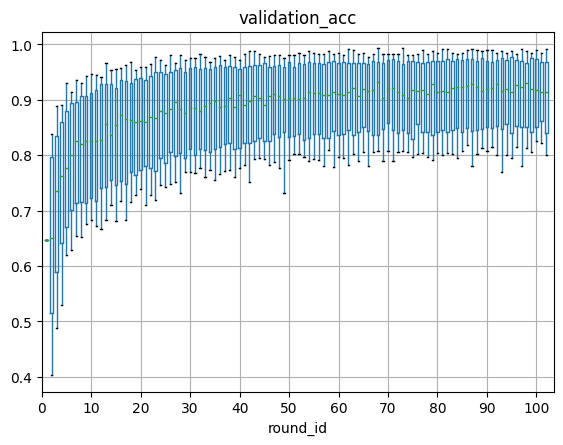

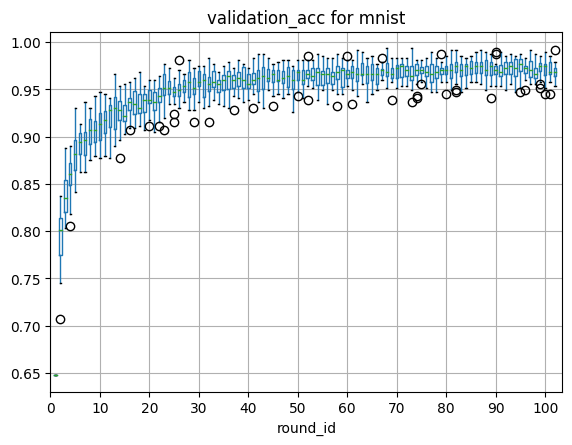

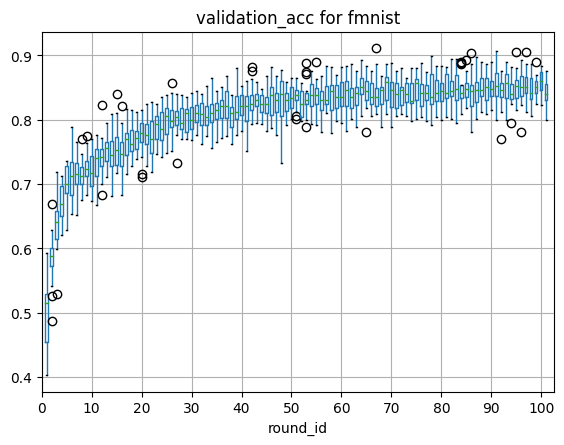

In [21]:
boxplot_metric(df, "validation_acc")

C:\Users\micdu\AppData\Local\Temp\ipykernel_24508\4014463099.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\AppData\Local\Temp\ipykernel_24508\4014463099.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\AppData\Local\Temp\ipykernel_24508\4014463099.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


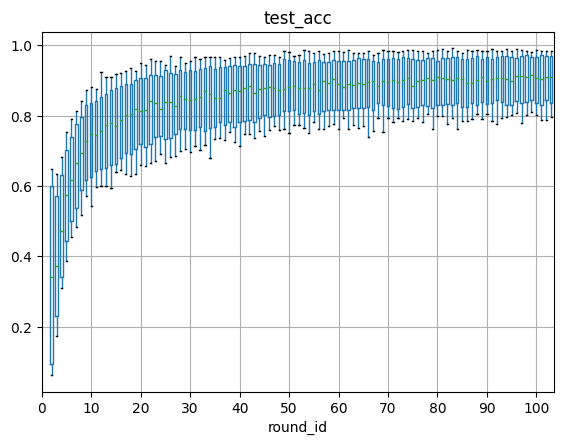

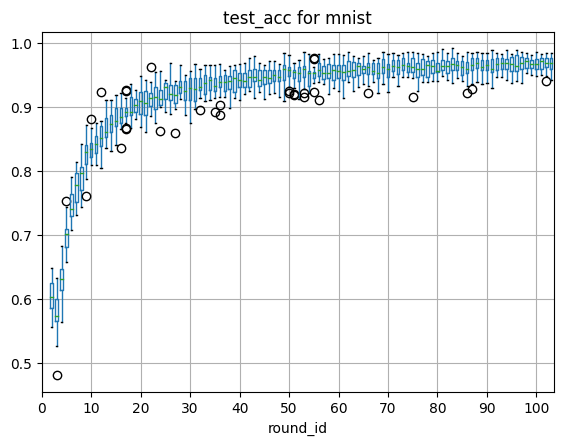

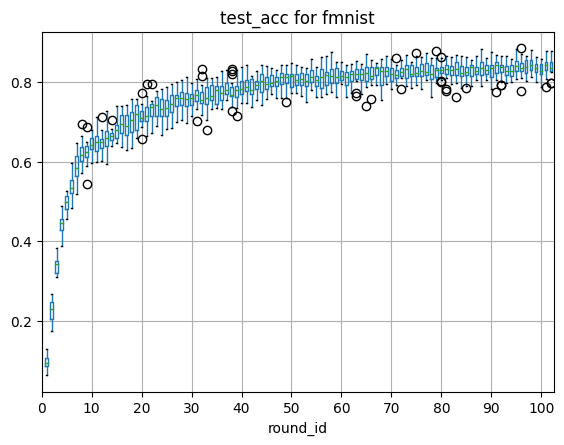

In [22]:
boxplot_metric(df, "test_acc")